# Classifying Palmer Penguins

Throughout this blog post, I determined a model and features which achieves 100% accuracy in the Palmer Penguins Dataset. All code is contained within this notebook.

## Exploration

Below are two displayed figures, one displayed table alongside one displayed figure. 

## Displayed Table:  Sex v. Body Mass (g)

From this aggregation (seen below), it is clear the body mass of male penguins is significantly larger than the mass of female penguins. I hypothesized as much, but was curious how mean body mass' compared between female and male penguins. On average, male penguins are approximately 800 grams larger than female penguins. This is interesting, not for prediction of species (unless number of females and males is an indicator for species, which is something to explore later), but for prediction of gender. 

In [11]:
#one interesting displayed table w/ pandas.groupby().aggregate, discussion of figure/table

X_train.groupby('Sex_FEMALE')['Body Mass (g)'].mean()


Sex_FEMALE
0    4613.076923
1    3823.214286
Name: Body Mass (g), dtype: float64

## Displayed Figure: Relationship between Culmen Length and Body Mass per Island

The figures below describe the relationship between Culmen Length (mm) and Body Mass (g) in the penguins found in each island. On the left, the relationship for penguins on Dream Island and Togerson Island is shown (orange being Dream Island, blue being Torgerson Island). On the right, the relationship for penguins on Biscoe Island is shown. It is clear that on Biscoe Island there is a pretty linear relationship between increasing Culmen Length and increasing Body Mass. This is curious, as it points to perhaps a more homogenous penguin species population on Biscoe Island -- the relationship is consistent for the majority of penguins on the island. Looking at Dream and Torgerson Island on the left, there is almost no relationship between Culmen Length and Body Mass. This could mean a few things; there is a wide variety of penguin species on the two islands, affecting the linearity of the relationship between the two features, or the species of penguin typically found on the two islands does not increase in Body Mass with an increase in Culmen Length. 

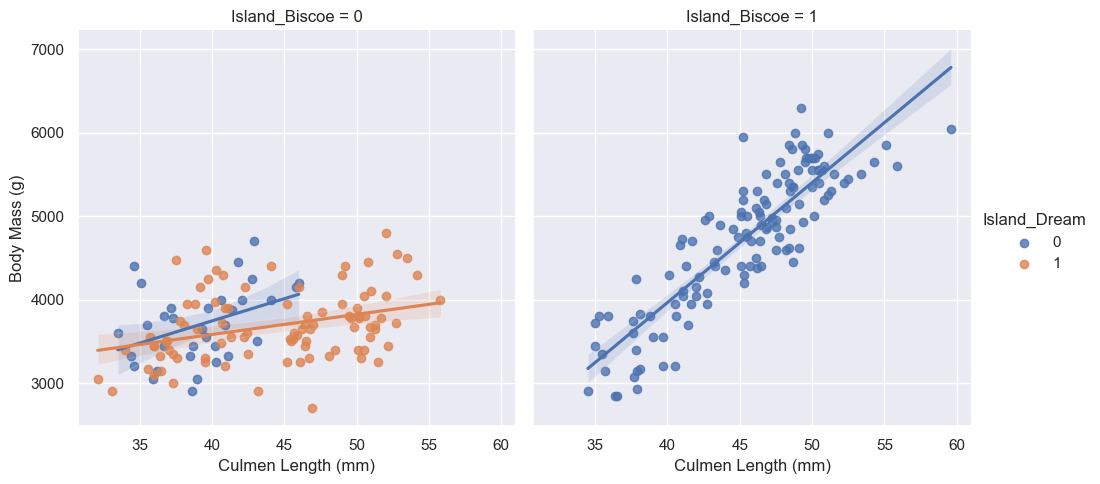

In [12]:
# one interesting displayed figure with seaborn + discussion

import seaborn as sns

sns.set_theme()

sns.lmplot(
data=X_train, 
x="Culmen Length (mm)",y="Body Mass (g)", col = "Island_Biscoe",
hue="Island_Dream")

## Model: Determining Features and Model

Next, I determined the model and features to use in order to reach 100% accuracy on the testing data. With a reproducible method, I found Logistic Regression and Island, Culmen Length, and Culmen Depth to achieve 100% testing accuracy. 

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #max_depth parameter, controls complexity of model, use cross-valudation to find good value of parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #parameter gamma that controls complexity, use cross-validation to select (cover a wide range of values)
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

#how the data works
train.head()


le = LabelEncoder()
le.fit(train["Species"])

#this is just preparing the data i.e. dropping n/as 
def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

#X_train


In [14]:
#selecting the columns that we want
all_qual_cols = ["Clutch Completion", "Sex", "Island", "Stage"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15N', 'Delta 13C']

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
     
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

cols_to_use = []
best_score = 0

for qual in all_qual_cols: 
    qual_cols = [col for col in X_train.columns if qual in col]
    for pair in combinations(all_quant_cols, 2):
        cols = list(pair) + qual_cols 
       # print(cols)
        # you could train models and score them here, keeping the list of 
        # columns for the model that has the best score. 
        # 
        lr.fit(X_train[cols], y_train)
        if lr.score(X_train[cols], y_train) > best_score:
            cols_to_use = cols
            model = "logistic regression"
            best_score = lr.score(X_train[cols], y_train)
            
        
        dt.fit(X_train[cols], y_train)
        if dt.score(X_train[cols], y_train) > best_score:
            cols_to_use = cols
            model = "decision tree"
            best_score = lr.score(X_train[cols], y_train)
            
         
        rf.fit(X_train[cols], y_train)
        if rf.score(X_train[cols], y_train) > best_score:
            cols_to_use = cols
            model = "random forest"
            best_score = lr.score(X_train[cols], y_train)
            
        
        svc.fit(X_train[cols], y_train)
        if svc.score(X_train[cols], y_train) > best_score:
            cols_to_use = cols
            model = "svc"
            best_score = lr.score(X_train[cols], y_train)
            
            
        break
    




/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

## Testing Model and Features for 100% Accuracy

Again, via the reproducible model above, I found the Logistic Regression Model and features Island, Culmen Length (mm), and Culmen Depth (mm) should find an accuracy of 100% with the testing data. This is confirmed below, where the model achieves an accuracy of 100% with the test data. 

In [15]:
LR = LogisticRegression()
LR.fit(X_train[cols_to_use], y_train)
LR.score(X_train[cols_to_use], y_train)


test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

LR.score(X_test[cols_to_use], y_test)



/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [16]:
from matplotlib import pyplot as plt
import numpy as np

## Evaluate: Decision Regions of Final Model

As seen below, utilizing the Logistic Regression Model alongside the features Island, Culmen Length (mm), and Culmen Depth (mm) yields an accuracy of 1.0 and perfectly splits the decision regions. 

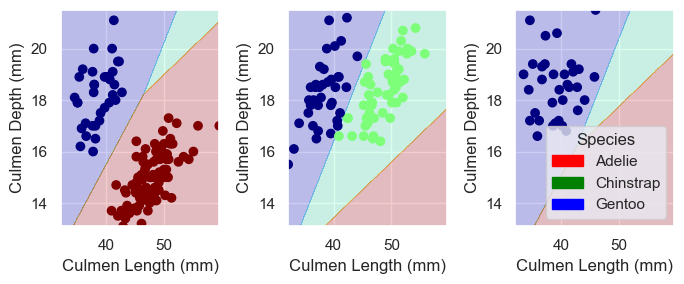

In [17]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()
    
    
plot_regions(LR, X_train[cols_to_use], y_train)